In [179]:
#Denis Schegletov
#d.shchegletov@innopolis.university

#importing libraries
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [180]:
#2.1

#reading csv and changing "0" column to datetime format
data = pd.read_csv('./task1_dataset.csv')
data["0"] = pd.to_datetime(data["0"])
data

,Unnamed: 0,0,1,2,3
0,0,2017-02-10 07:00:00,25.618887,-0.932839,3.900162
1,1,2017-02-04 20:00:00,28.559832,-1.171867,0.223089
2,2,2017-02-18 16:00:00,31.390287,0.826090,2.069539
3,3,2017-01-15 08:00:00,14.205741,-0.921493,1.207404
4,4,2017-02-09 03:00:00,25.047604,0.294643,4.731710
...,...,...,...,...,...
1995,1995,2017-01-23 10:00:00,20.383428,1.447426,-2.971402
1996,1996,2017-01-17 05:00:00,17.117614,0.252971,0.684403
1997,1997,2017-02-14 17:00:00,NaN,NaN,NaN
1998,1998,2017-02-05 03:00:00,NaN,NaN,NaN


      Unnamed: 0     0         1         2         3
1999        1999     0       NaN       NaN       NaN
1327        1327     1  5.525603  0.149548  0.188817
1973        1973     2  5.724147  0.089343  0.167879
1919        1919     3  5.226627 -0.050859  0.066940
605          605     4  5.648900  0.072186  0.229240
...          ...   ...       ...       ...       ...
1805        1805  1995       NaN       NaN       NaN
1290        1290  1996       NaN       NaN       NaN
1117        1117  1997       NaN       NaN       NaN
592          592  1998       NaN       NaN       NaN
267          267  1999       NaN       NaN       NaN

[2000 rows x 5 columns]


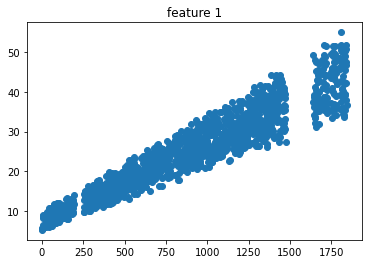

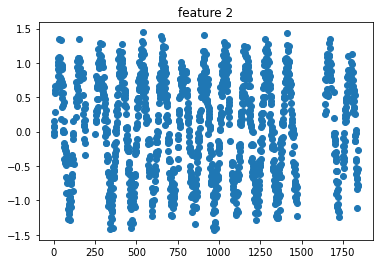

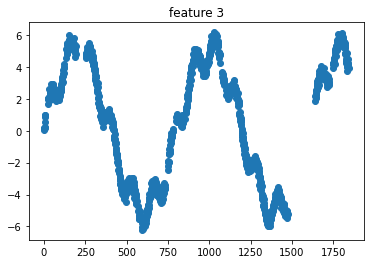

In [181]:
#Encoding datetime column with integer values from 0 to len(dataset)
#sort datetime column, to change values  
sorted_data = data.sort_values(by = "0")
nums = [i for i in range(sorted_data.shape[0])]
dic = {"0": nums}
temp = pd.DataFrame(dic)
sorted_data["0"] = temp["0"].values

#Ploting all features of the dataset (on separate plots)
df = sorted_data.sort_index(0)
print(df.sort_values(by = "0"))
for ind, row in df.iloc[:, 2:].items():
    plt.figure()
    plt.scatter(df["0"], row)
    plt.title(label="feature " + str(ind))

DataFrame with predicted values, using polynomial regression with degree 1
      Unnamed: 0     0          1         2         3
1999        1999     0   7.570066  0.101397  0.594998
1327        1327     1   5.525603  0.149548  0.188817
1973        1973     2   5.724147  0.089343  0.167879
1919        1919     3   5.226627 -0.050859  0.066940
605          605     4   5.648900  0.072186  0.229240
...          ...   ...        ...       ...       ...
1805        1805  1995  47.149500  0.039144  0.211520
1290        1290  1996  47.169339  0.039113  0.211328
1117        1117  1997  47.189179  0.039082  0.211136
592          592  1998  47.209018  0.039051  0.210944
267          267  1999  47.228857  0.039019  0.210751

[2000 rows x 5 columns]

DataFrame with predicted values, using polynomial regression with degree 2
      Unnamed: 0     0          1         2         3
1999        1999     0   7.363094  0.201463  3.438017
1327        1327     1   5.525603  0.149548  0.188817
1973        19

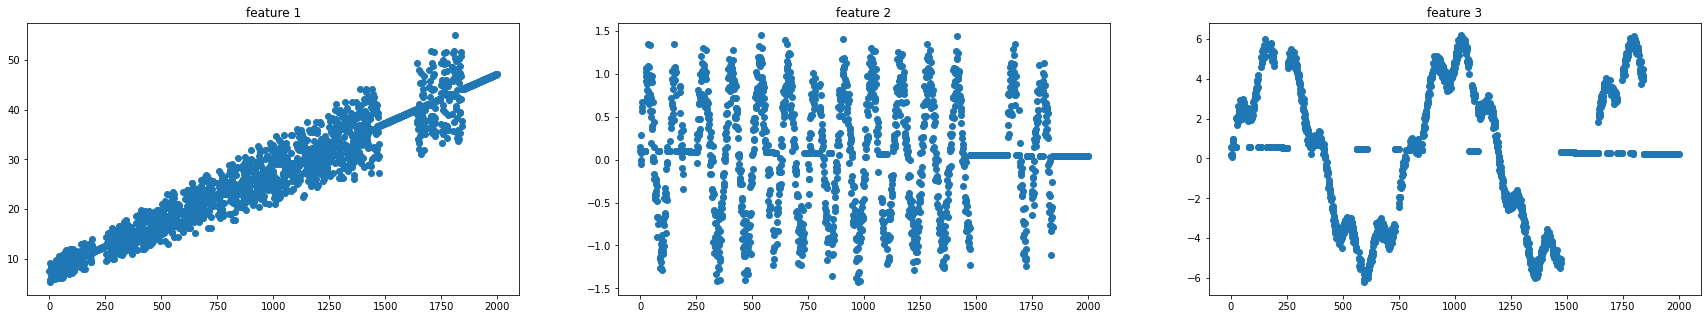

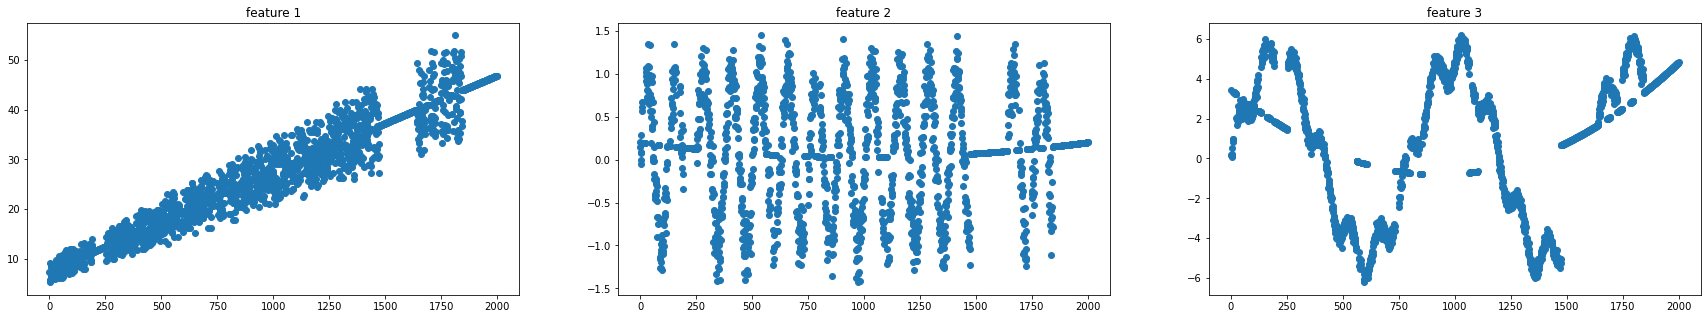

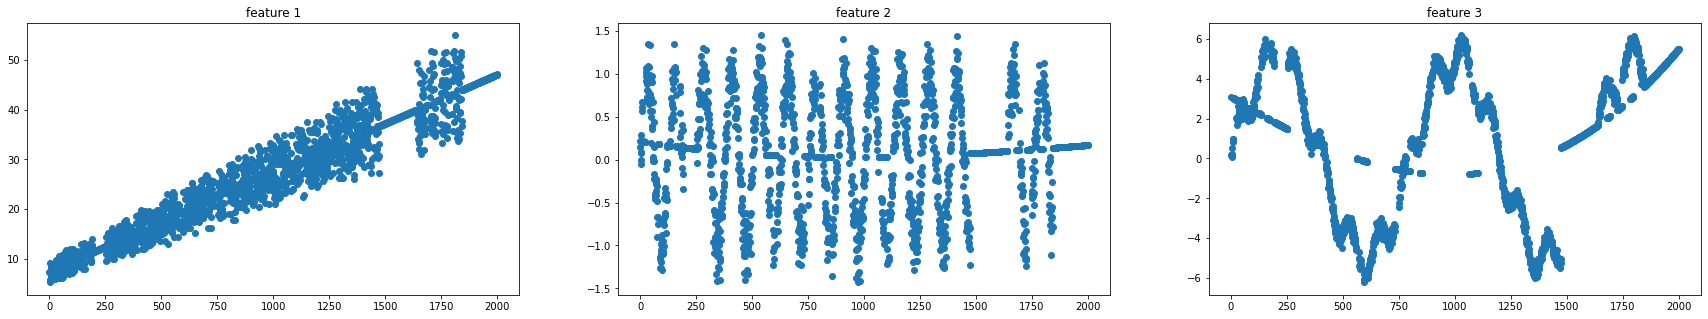

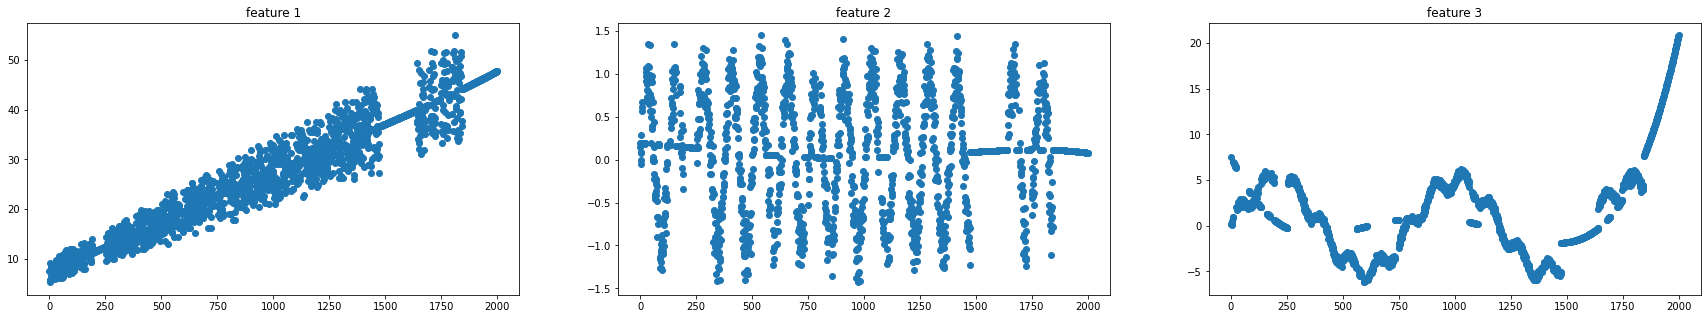

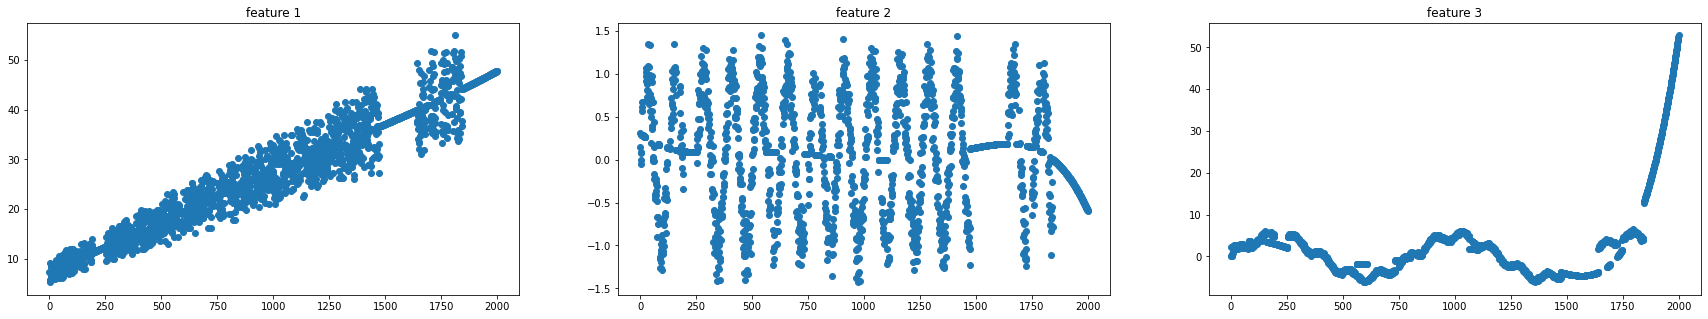

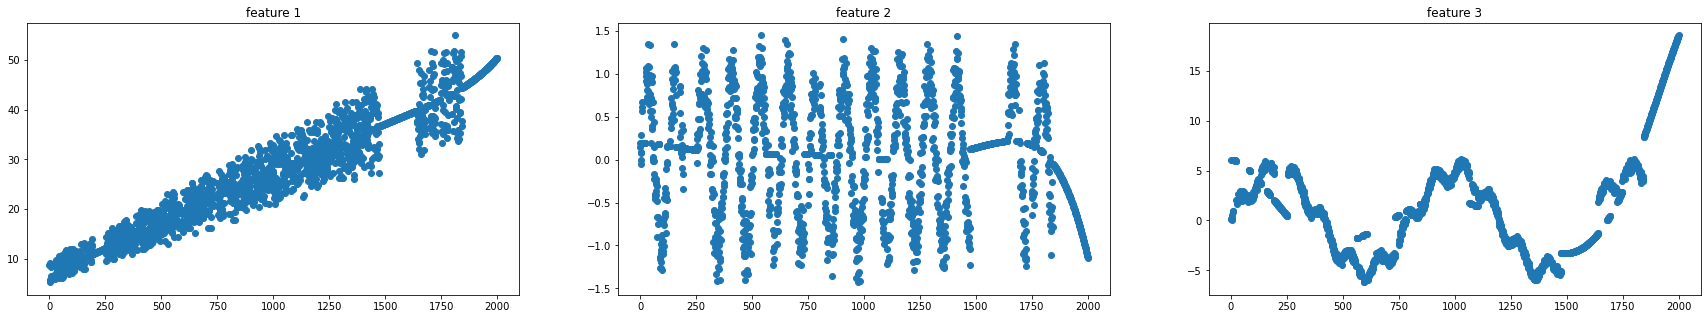

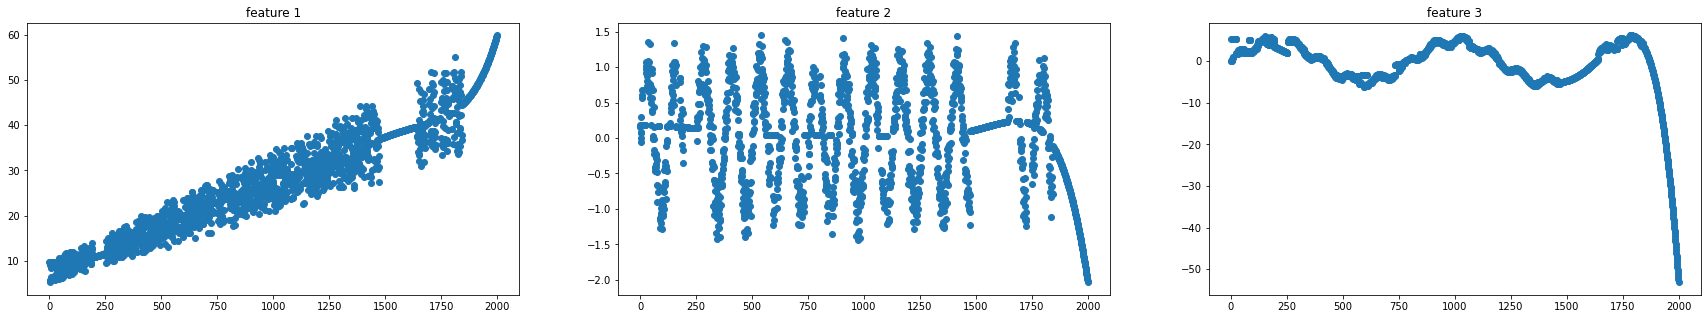

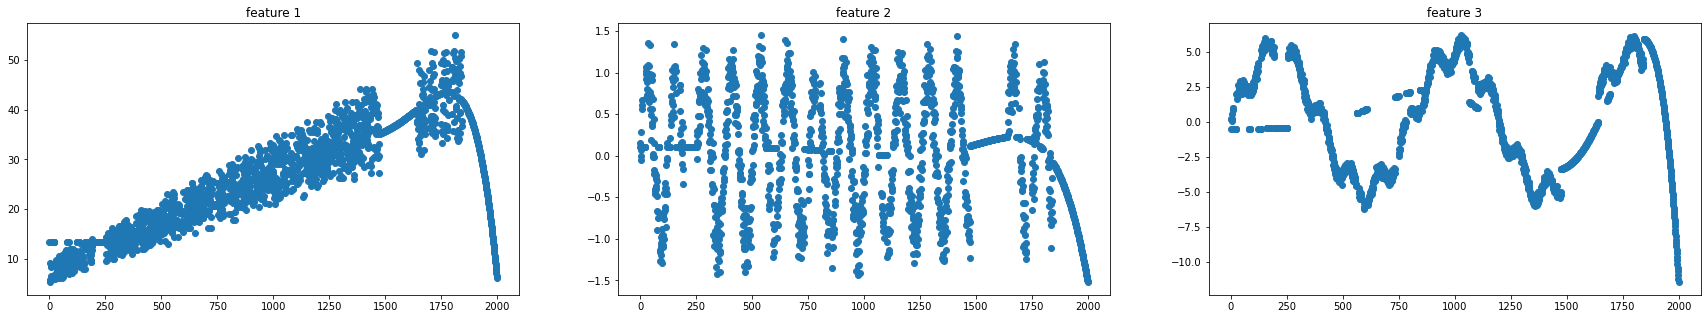

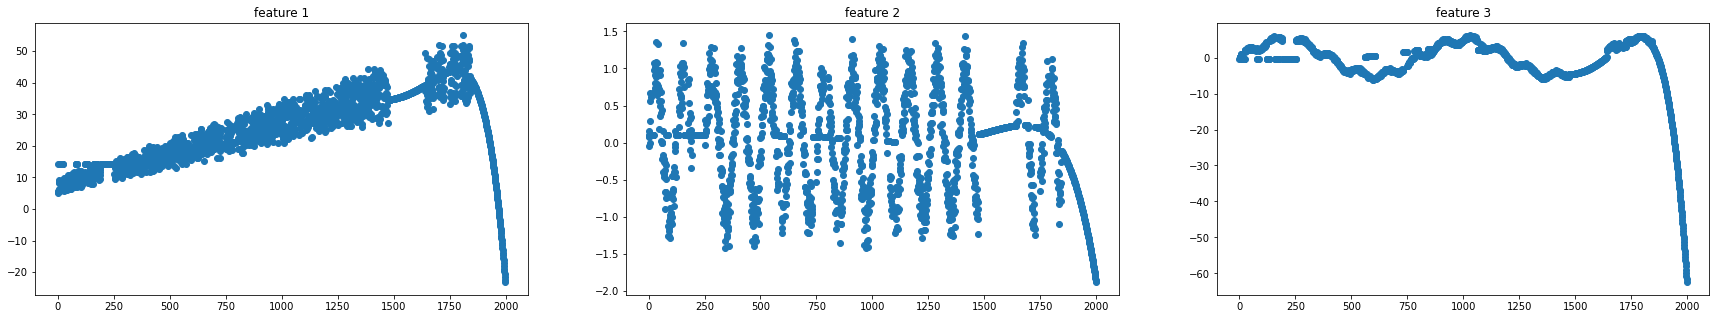

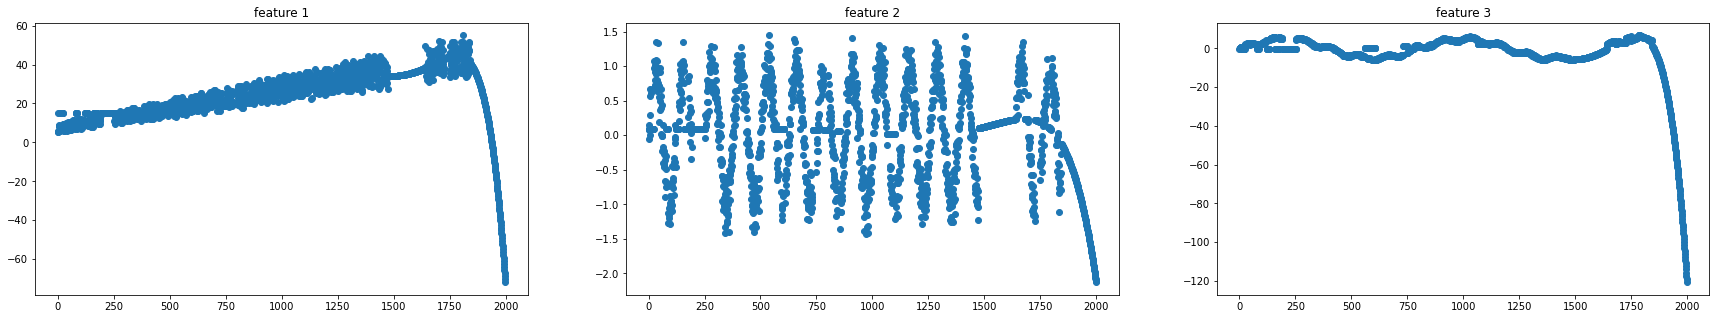

In [182]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def train_regression(regressor, df):
    feature_names = df.columns[2:]
    #for feature 1, 2, 3 determine test data and train data, fit to regressor, predict results and add them to the original DataFrame
    for index, elem in enumerate(feature_names):
        #test data is all rows where feature is Nan
        test = df[df[elem].isnull()]
        #test data is all rows where feature is not Nan
        train = df[df[elem].notnull()]

        #making 2d arrays from DataFrames
        x_train = train["0"].values.reshape(-1,1)
        x_test = test["0"].values.reshape(-1,1)
        y_train = train[elem].values
        
        #train data and predict values that are currently Nan 
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        
        #add values to original DataFrame
        #use this syntax to calculate column name which is str(index+1)
        test = test.assign(**{str(index+1): y_pred})
        df = pd.concat([test, train])
    return df.sort_values(by="0")

#array of DataFrames with predicted data for every degree in range from 1 to 10
list_data_pred = []
for i in range(1, 11):
    #add new features, which are equal to the original feature Datetime in power of <degree>
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    #After that, feed all these features to the linear regression using pipeline
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    #DataFrame with predicted values
    df_pred = train_regression(pipeline, df)
    print(f"DataFrame with predicted values, using polynomial regression with degree {i}")
    print(df_pred)
    print()
    #plotting all data in a loop for every degree
    fig, axes = plt.subplots(1,3, figsize=(30,5))
    for ind, row in df_pred.sort_index(0).iloc[:, 2:].items():
        axes[int(ind)-1].scatter(df["0"], row)
        axes[int(ind)-1].set_title("feature " + str(ind))
    list_data_pred.append(df_pred)

In [183]:
from sklearn.metrics import mean_squared_error
#reading spreadshit with data
data_true = pd.read_csv('./task1_dataset_full.csv')
#features 1,2,3
feature_names = data_true.columns[2:]

In [184]:
def plotting_MSE(list_data_pred: list):
    plt.figure(figsize=(20,4))
    mses = []
    #calculating MSE for every DataFrame generated by model with different degrees
    for data_pred in list_data_pred:
        mse = 0
        for ind, feature in enumerate(feature_names):
            mse += mean_squared_error(data_true[feature].values, data_pred[str(ind+1)].values)
        mses.append(mse)
    degrees = range(1,11)
    print("MSEs are:")
    #printing MSEs
    for i, mse in enumerate(mses):
        print(f"degree {i+1}: {mse}")
    #plotting MSEs
    plt.scatter(degrees, mses, c="r")
    plt.title("MSE for all features")
    plt.xlabel("degree")
    plt.ylabel("MSE")
    #returning degree with lowest MSE
    return degrees[np.argmin(mses)]

MSEs are:
degree 1: 24.097260218643253
degree 2: 23.554046876530123
degree 3: 23.667602339717973
degree 4: 34.58826194319526
degree 5: 96.00837536572188
degree 6: 33.30855393867573
degree 7: 69.74213937116536
degree 8: 59.064169002007404
degree 9: 175.4705915160436
degree 10: 494.6412355322839
best degree for all features is 2


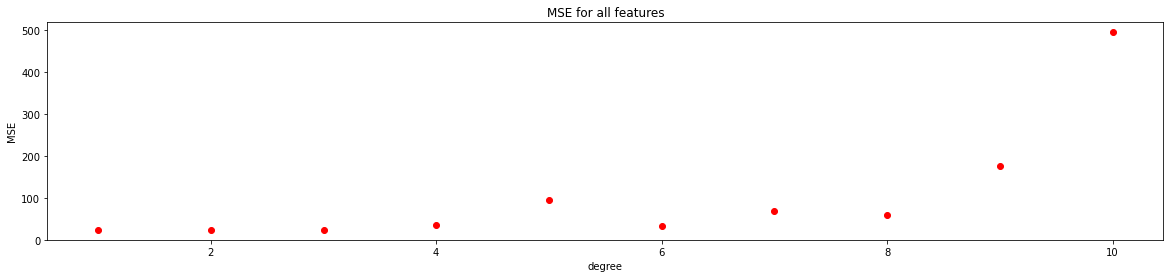

In [185]:
best_deg = plotting_MSE(list_data_pred)
print(f"best degree for all features is {best_deg}")

for feature feature1 best degree is 5
for feature feature2 best degree is 1
for feature feature3 best degree is 2


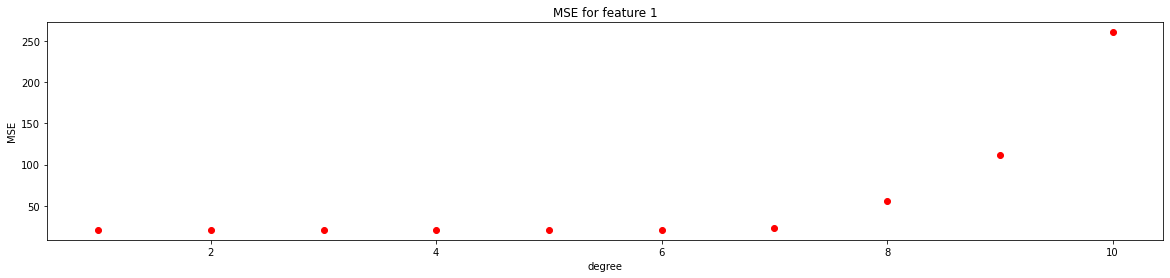

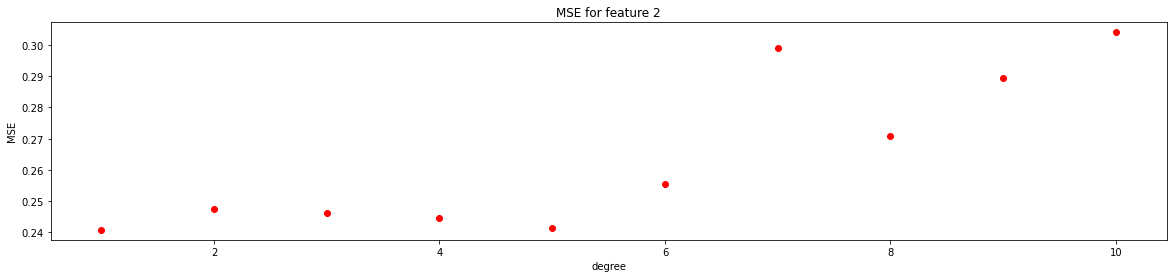

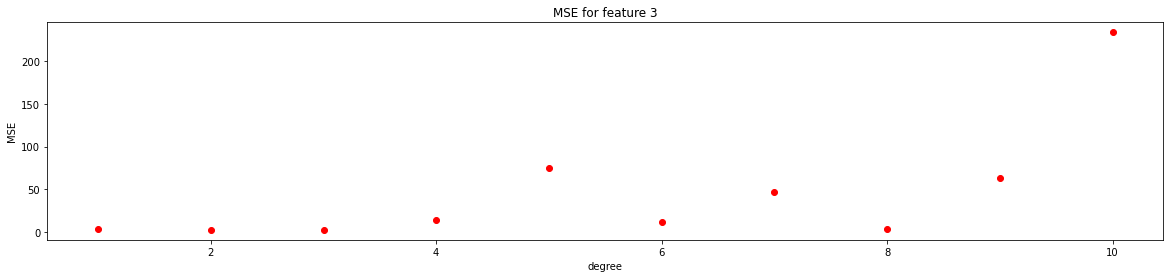

In [186]:
feature_names = data_true.columns[2:]
#same as above, but instead of summung MSEs from all features, we calculate MSE for every feature
def plotting_MSE(list_data_pred: list, feature_index):
    mses = []
    for data_pred in list_data_pred:
        mse = mean_squared_error(data_true[feature_names[feature_index]].values, data_pred[str(feature_index+1)].values)
        mses.append(mse)
    plt.figure(figsize=(20,4))
    degrees = range(1,11)
    plt.scatter(degrees, mses, c="r")
    plt.title(f"MSE for feature {feature_index + 1}")
    plt.xlabel("degree")
    plt.ylabel("MSE")
    return degrees[np.argmin(mses)]

#determining best degree for every feature
for feature_index in range(len(feature_names)):
    best_degree = plotting_MSE(list_data_pred, feature_index)
    print(f"for feature {feature_names[feature_index]} best degree is {best_degree}")

#features best_degree
#1        5
#2        1
#3        2
#For feature 1, values are scattered around straight line, as time passes noise have higher variance.
#Best degree is 5 because it overfits on training data. But in reality it may have different degree (most likely it is 1)

#For feature 2, model is overfiting for all degrees except 1.
#Values are scattered like sin function.
#Because of that, polynomial function will increase or decrease for large values, which isn't real behaviour of sin function or this feature.
#That's why model doesn't tolerate overfitting that much.

#For feature 3, model have good results for different degrees such as 2 or 8.
#Values are scattered like cost of shares in stock market.
#Model tolerates overfitting, that's why it behaves so good for different degrees.

In [187]:
#3.1
#reading data, we use header=None, because first row is part of data, but not part of column names
data = pd.read_csv('./GermanData.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [188]:
from sklearn.preprocessing import OneHotEncoder

#Beware that there no elements with A95 and A47 in the original dataset
new_col_names = [["A11", "A12", "A13", "A14"],
              ["A30", "A31", "A32", "A33", "A34"],
              ["A40", "A41", "A42", "A43", "A44", "A45", "A46", "A47", "A48", "A49", "A410"],
              ["A61", "A62", "A63", "A64", "A65"],
              ["A71", "A72", "A73", "A74", "A75"],
              ["A91", "A92", "A93", "A94", "A95"],
              ["A101", "A102", "A103"],
              ["A121", "A122", "A123", "A124"],
              ["A141", "A142", "A143"],
              ["A151", "A152", "A153"],
              ["A171", "A172", "A173", "A174"],
              ["A191", "A192"],
              ["A201", "A202"],
             ]

renamed_col_names = {
    1:"Duration in month",
    4:"Credit amount",
    7:"Installment rate ",
    10:"Present residence since",
    12:"Age in years",
    15:"Number of existing credits",
    17:"Number of people being liable",
    20:"y"
}


def ohe_new_features(df, features_name, encoder):
    #encode new features as different columns with values 0 and 1 instead of qualitative value
    encoder.fit(df[features_name])
    new_feats = encoder.transform(df[features_name])
    #create new DataFrame using new features and concatinate with old DataFrame and drop columns with qualitative values
    new_col_names_1d = []
    for arr in new_col_names:
        new_col_names_1d += arr
    new_cols = pd.DataFrame(new_feats, columns = new_col_names_1d, dtype=int)
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df


encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, categories=new_col_names)
#columns with qualitative values have "object" type
cat_feats = data.loc[:, data.dtypes == "object"].columns
data = ohe_new_features(data, cat_feats, encoder)
#Encoding y as 1 = good loan applicant, 0 = bad loan applicant
data[20] = data[20].map({2: 1, 1: 0})

#renaming numerical values
data = data.rename(columns=renamed_col_names)
data.head()

,Duration in month,Credit amount,Installment rate,Present residence since,Age in years,Number of existing credits,Number of people being liable,y,A11,A12,...,A152,A153,A171,A172,A173,A174,A191,A192,A201,A202
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0


In [189]:
from sklearn.preprocessing import StandardScaler

#I decided to scale data, because PCA require scaled data for better performance of choosing features with highest variance. Also without slaling data model performs poorly(I get predict_proba=0.5, which is just random).
#https://stackoverflow.com/questions/37221425/which-feature-scaling-method-to-use-before-pca
#scaling data
def scaling(df):
    scaler = StandardScaler()
    scaler.fit(df)
    return scaler.transform(df)

#scale only numerical data
scaled_data_numerical = scaling(data[data.columns[:7]])
scaled_df_numerical = pd.DataFrame(scaled_data_numerical, columns = data.columns[:7])
scaled_data = data.copy()
scaled_data.update(scaled_df_numerical)
data = scaled_data
data

,Duration in month,Credit amount,Installment rate,Present residence since,Age in years,Number of existing credits,Number of people being liable,y,A11,A12,...,A152,A153,A171,A172,A173,A174,A191,A192,A201,A202
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,1,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290,0,0,0,...,1,0,0,1,0,0,1,0,1,0
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290,0,1,0,...,1,0,0,0,0,1,0,1,1,0
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290,0,0,0,...,1,0,0,0,1,0,1,0,1,0
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290,1,1,0,...,0,1,0,0,1,0,0,1,1,0


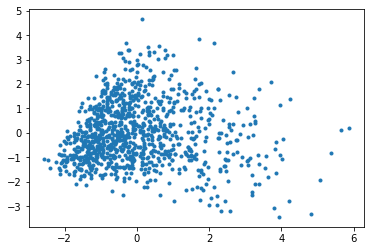

In [190]:
from sklearn.decomposition import PCA
#use PCA with n=2 and plot that data
pca = PCA(n_components=2)
reduced_dim_data = pca.fit_transform(scaled_data)
plt.plot(reduced_dim_data[:, 0], reduced_dim_data[:, 1],  '.')

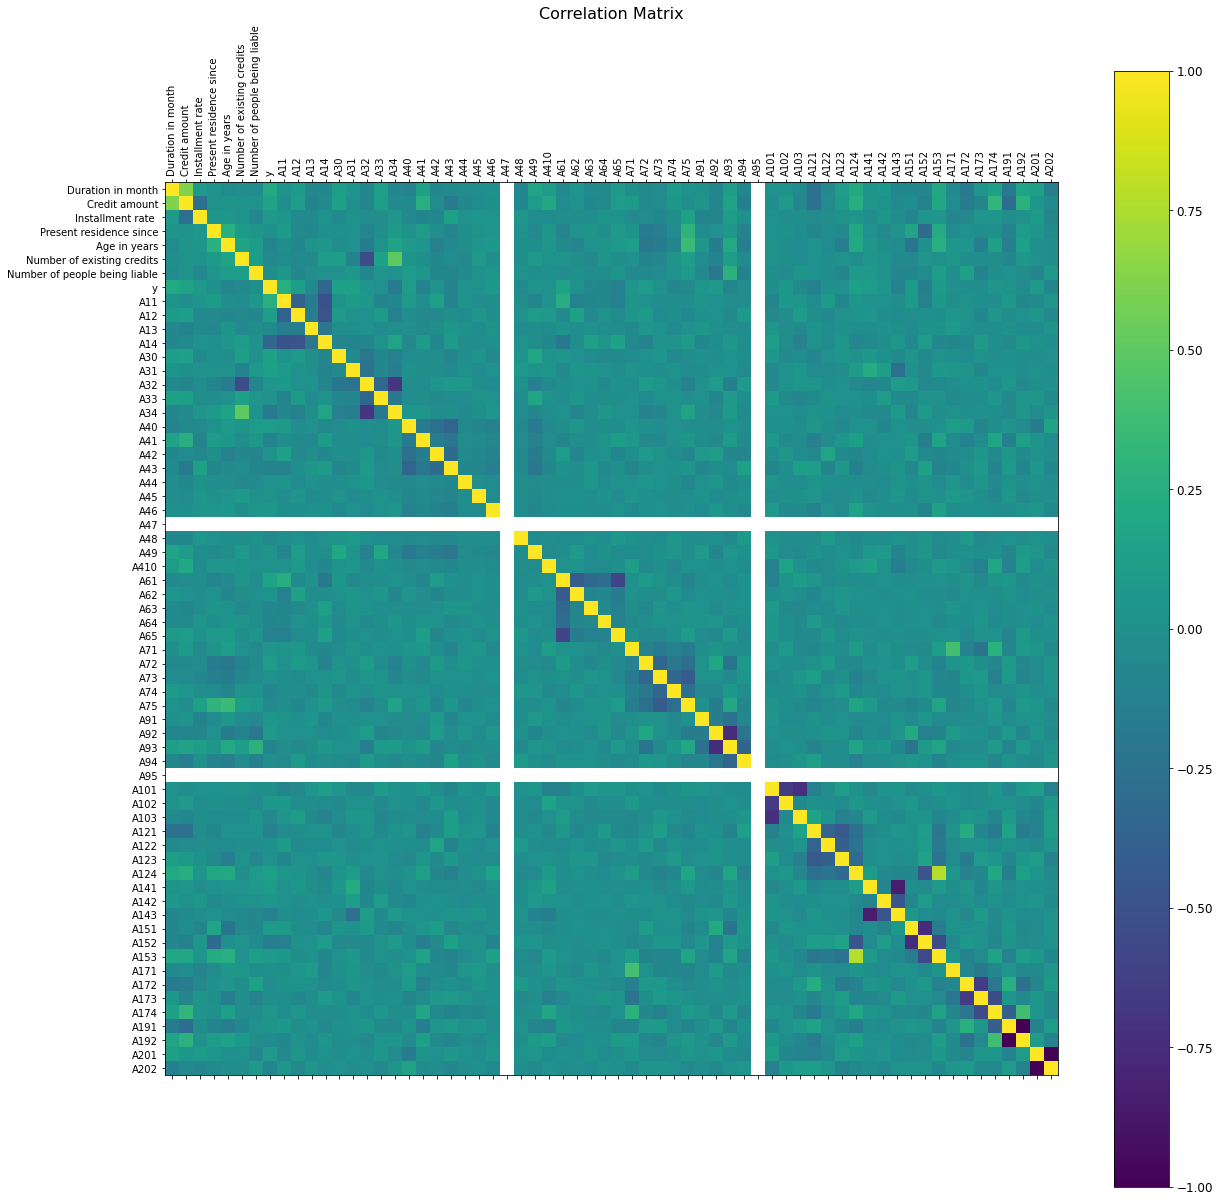

In [191]:
#correlation matrix of DataFrame
corr_matrix = data.corr()
#plot settings are taken with changes of size from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
f = plt.figure(figsize=(20, 20))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(data.select_dtypes(["number"]).shape[1]), data.select_dtypes(["number"]).columns, fontsize=10, rotation=90)
plt.yticks(range(data.select_dtypes(["number"]).shape[1]), data.select_dtypes(["number"]).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title("Correlation Matrix", fontsize=16);
#As seen in the plot, there are highly correlated terms(they are in purple and green colors)
#examples are "Duration in month" and "credit amount"
#It is not a problem, but preferably there should be independent terms

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import log_loss
import warnings

#spltiting data
X = data.drop(columns=["y"])
y = data["y"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#save errors in lists
errors_test = []
errors_train = []

#suppress warnings about convergence
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    
    #Feed all data to the logistic regression using pipeline
    for i in range(1, 11):
        polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
        pol_feature_columns = list(renamed_col_names.values())
        pol_feature_columns.remove("y")
        #we are powering only columns with numerical data, because there is no sense to multiply categorical data with numerical
        #regression takes as argument polynom(numerical)+categorical, where + is concatenation
        col_tran = ColumnTransformer(transformers = [("polynomial_features", polynomial_features, pol_feature_columns)],
                                     remainder = "passthrough")
        logistic_regression = LogisticRegression()
        #after making columns with data powered by degree from [1;11], we are feeding it to the regression
        pipeline = Pipeline([("col_tran", col_tran),
                             ("logistic_regression", logistic_regression)])
        pipeline.fit(x_train, y_train)
        #predicting probabilites to find error using log loss
        predict_proba_test = pipeline.predict_proba(x_test)
        predict_proba_train = pipeline.predict_proba(x_train)

        error_test = log_loss(y_test, predict_proba_test, labels=[0,1])
        error_train = log_loss(y_train, predict_proba_train, labels=[0,1])
        #appending errors to plot them later
        errors_test.append(error_test)
        errors_train.append(error_train)

best degree according to test errors is 2


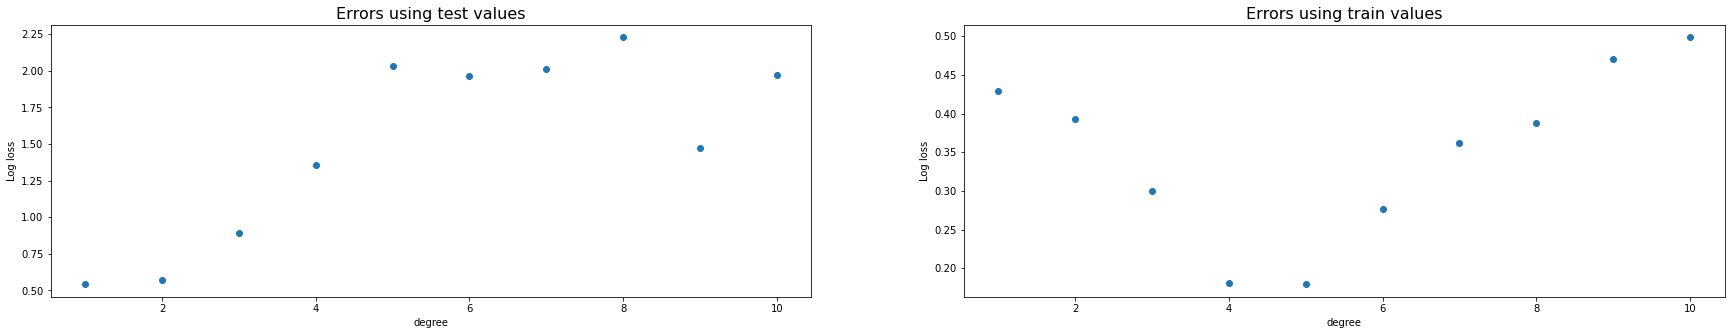

In [193]:
#ploting data using subplots
fig, axes = plt.subplots(1,2, figsize=(30,5))
axes[0].scatter(range(1,11), errors_test)
axes[0].set_title("Errors using test values", fontsize=16)
axes[0].set_xlabel("degree")
axes[0].set_ylabel("Log loss")
axes[1].scatter(range(1,11), errors_train)
axes[1].set_title("Errors using train values", fontsize=16)
axes[1].set_xlabel("degree")
axes[1].set_ylabel("Log loss")
#best degree is the one that has small error on test set, while train set is relatively small(I use minimum of sum of train and test errors), in that way we minimize both variance and bias, but later we fine-tune hyper-parameters to minimize bias truly
best_degree = np.argmin([train + test for train, test in zip(errors_test, errors_train)]) + 1
print(f"best degree according to test errors is {best_degree}")
#for random_state=0, model is overfitting with degrees more than 3(most overfitting model with degree 5), and there no underfitting model(but most underfitting model with degree 1)

In [194]:
from sklearn.model_selection import GridSearchCV

#some of the solver doesn't support certain penalties, that's why there only 3 options
#syntax for parameters is <name of component in pipeline>__<parameter name>
parameters = [{"logistic_regression__C": np.logspace(-4, 4, 20),
              "logistic_regression__solver": ["liblinear"],
              "logistic_regression__penalty": ["l1"]
             },
             {"logistic_regression__C": np.logspace(-4, 4, 20),
              "logistic_regression__solver": ["lbfgs"],
              "logistic_regression__penalty": ["l2"]
             },
             {"logistic_regression__C": np.logspace(-4, 4, 20),
              "logistic_regression__solver": ["liblinear"]
             }]
#code for our model
polynomial_features = PolynomialFeatures(degree=best_degree, include_bias=False)
pol_feature_columns = list(renamed_col_names.values())
pol_feature_columns.remove("y")
col_tran = ColumnTransformer(transformers = [("polynomial_features", polynomial_features, pol_feature_columns)],
                             remainder = "passthrough")
logistic_regression = LogisticRegression()
pipeline = Pipeline([("col_tran", col_tran),
                     ("logistic_regression", logistic_regression)])

#finding best hyperparameters using grid search CV
clf = GridSearchCV(pipeline, parameters)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    clf.fit(x_train, y_train)
best_params = clf.best_params_

In [195]:
#saving best hyperparameters
best_C = best_params["logistic_regression__C"]
best_penalty = best_params["logistic_regression__penalty"]
best_solver = best_params["logistic_regression__solver"]

#making model with best parameters and hyperparameters and training it
polynomial_features = PolynomialFeatures(degree=best_degree, include_bias=False)
pol_feature_columns = list(renamed_col_names.values())
pol_feature_columns.remove("y")
col_tran = ColumnTransformer(transformers = [("polynomial_features", polynomial_features, pol_feature_columns)],
                             remainder = "passthrough")
logistic_regression = LogisticRegression()
pipeline = Pipeline([("col_tran", col_tran),
                     ("logistic_regression", logistic_regression)])

pipeline.fit(x_train, y_train)
best_params

/home/denis/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic_regression__C': 0.615848211066026,
 'logistic_regression__penalty': 'l2',
 'logistic_regression__solver': 'lbfgs'}

In [198]:
from sklearn.metrics import accuracy_score

#predicting data from test set
y_pred = pipeline.predict(x_test)
df_pred = x_test.assign(y=y_pred)
#dividing data into 2 groups: males and females
male = df_pred[(df_pred["A94"] == 1) | (df_pred["A93"] == 1) | (df_pred["A91"] == 1)]
female = df_pred[(df_pred["A92"] == 1) | (df_pred["A95"] == 1)]
#there is only 2 values, there nothing to plot

male_accuracy = accuracy_score(y_test[male.index], male['y'])
female_accuracy = accuracy_score(y_test[female.index], female['y'])
print(f"accuracy for males is {male_accuracy}")
print(f"accuracy for females is {female_accuracy}")
#for different random states, accuracy may change, but it is around 0.70-0.8, and accuracy(females)+accuracy(males)=1.5
#For random_state=0
#Accuracy is higher for males.
#It means males are more likely to be classified correctly by model than females.
#Which means model has some bias toward females
#It is because ratio of male and females of test and train sets are different, so model has more examples of males and remembers their features better
#       female   male   ratio(male/female)
#test   104      196    1.8846153846153846      
#train  206      494    2.3980582524271843

accuracy for males is 0.8010204081632653
accuracy for females is 0.7019230769230769
